In [1]:
import pyforest

In [2]:
beer = pd.read_csv('BeerWineLiquor.csv')

<IPython.core.display.Javascript object>

In [5]:
beer.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [4]:
beer.isnull().sum()

date    0
beer    0
dtype: int64

In [7]:
beer.date= pd.to_datetime(beer.date, infer_datetime_format=True)

<IPython.core.display.Javascript object>

In [8]:
beer.head()

,date,beer
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [14]:
beer= beer.set_index(['date'])

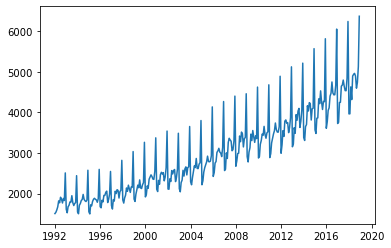

In [15]:
import matplotlib.pyplot as plt
plt.plot(beer)

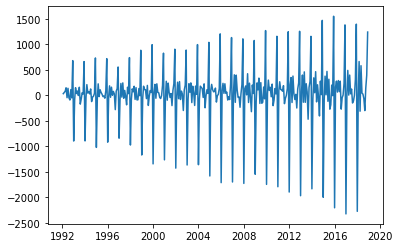

In [17]:
plt.plot(beer.diff())

In [18]:
beer = np.log(beer)

<IPython.core.display.Javascript object>

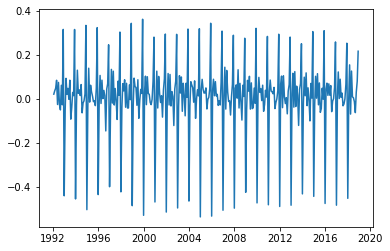

In [20]:
plt.plot(beer.diff())

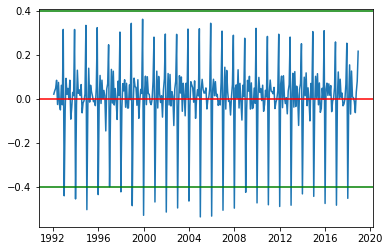

In [22]:
plt.plot(beer.diff()) # Now it is almost Stationary
plt.axhline(y = 0.4, color = 'g')
plt.axhline(y = 0, color = 'red')
plt.axhline(y = -0.4, color = 'g')

# Train And Test

In [23]:
train = beer.iloc[:300,]
test = beer.iloc[300:]

# Model

In [24]:
import pmdarima
from pmdarima import auto_arima
auto_arima(beer['beer'], seasonal = True, m=12)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


ARIMA(order=(3, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['beer'], order=(3,0,0),seasonal_order=(0, 1, 1, 12))
result = model.fit();

C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
pred_beer = result.predict(start = 300 , end = 323)

In [29]:
(pred_beer)

<IPython.core.display.Javascript object>

2017-01-01    3850.099623
2017-02-01    3902.236027
2017-03-01    4236.601470
2017-04-01    4294.159534
2017-05-01    4697.778256
2017-06-01    4633.149819
2017-07-01    4886.284469
2017-08-01    4727.777052
2017-09-01    4475.044940
2017-10-01    4628.845840
2017-11-01    4775.496983
2017-12-01    6377.703605
2018-01-01    3992.166243
2018-02-01    4036.701750
2018-03-01    4427.928040
2018-04-01    4453.013713
2018-05-01    4878.069941
2018-06-01    4824.736796
2018-07-01    5071.584160
2018-08-01    4913.324701
2018-09-01    4653.098183
2018-10-01    4807.123592
2018-11-01    4962.872694
2018-12-01    6627.529381
Freq: MS, Name: predicted_mean, dtype: float64

In [38]:
error = np.exp(test.beer) - np.exp(pred_beer)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
error

date
2017-01-01   -122.099623
2017-02-01   -143.236027
2017-03-01     10.398530
2017-04-01    -43.159534
2017-05-01    -50.778256
2017-06-01     42.850181
2017-07-01    -88.284469
2017-08-01    -80.777052
2017-09-01     62.955060
2017-10-01    -92.845840
2017-11-01     70.503017
2017-12-01   -136.703605
2018-01-01    -27.166243
2018-02-01    -69.701750
2018-03-01    201.071960
2018-04-01   -136.013713
2018-05-01     18.930059
2018-06-01    114.263204
2018-07-01   -108.584160
2018-08-01    -15.324701
2018-09-01    -55.098183
2018-10-01    -70.123592
2018-11-01    167.127306
2018-12-01   -257.529381
dtype: float64

In [40]:
MSE = np.mean(np.square(error))
MSE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

11855.978463149184